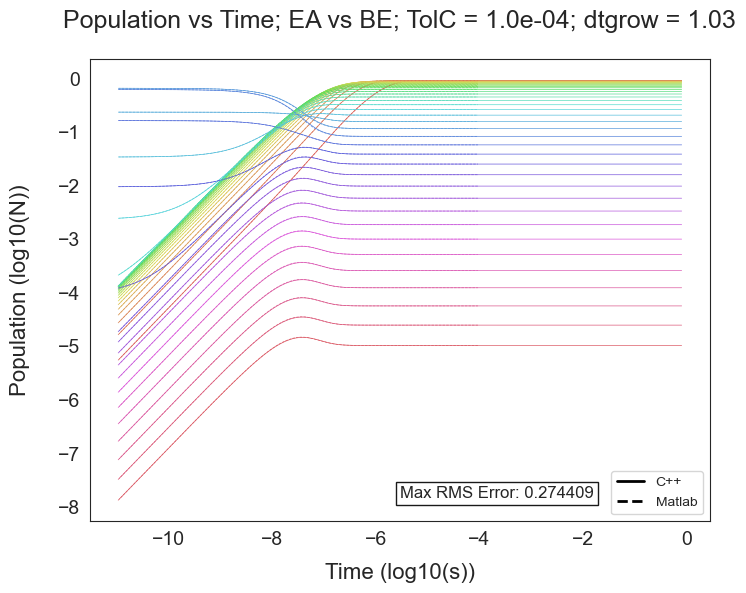

In [1]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Function to load data from files
def load_data(file_dir, file_prefix, num_files, cpp=True):
    t_values = []
    N_values = []
    for i in range(num_files):
        if cpp:
            filename = os.path.join(file_dir, f"PlotFile_{i}")
        else:
            filename = os.path.join(file_dir, f"PlotFile_{i+1}")
        
        with open(filename, "r") as f:
            if cpp:
                N = []
                for line in f:
                    if line.startswith("t:"):
                        t = float(line.split(": ")[1])
                    elif line.startswith("N:"):
                        N_line = line.split(": ")[1].strip()
                        N.append(np.array([float(x) for x in N_line.split()]))
            else:
                lines = f.readlines()
                t_index = lines.index("t\n") + 1
                t = float(lines[t_index].strip())
                N_index = lines.index("N\n") + 1
                N = []
                while True:
                    try:
                        N.append(float(lines[N_index].strip()))
                        N_index += 1
                    except ValueError:
                        break
        
        t_values.append(t)
        N_values.append(N)
    
    t_array = np.array(t_values)
    N_array = np.array(N_values)
    
    if not cpp:
        N_array = N_array.reshape(len(N_array), 1, -1)

    return t_array, N_array


# Load C++ data
file_dir_cpp = "./OutputC"
t_array_cpp, N_array_cpp = load_data(file_dir_cpp, "PlotFile_", 249)

# Load Matlab data
file_dir_matlab = "./OutputM"
t_array_matlab, N_array_matlab = load_data(file_dir_matlab, "PlotFile_", 250, cpp=False)

# Apply log10 to the arrays
t_log_array_cpp = np.log10(t_array_cpp)
N_log_array_cpp = np.log10(N_array_cpp)
t_log_array_matlab = np.log10(t_array_matlab)
N_log_array_matlab = np.log10(N_array_matlab)

# Perform the RMS error calculation for each time step
RMS_array = np.zeros((249,))
for i in range(1, 250):
    # Get the reference and approximation calculations for this time step
    R = N_array_matlab[i, :]
    A = N_array_cpp[i - 1, :].reshape(N_array_matlab.shape[1], -1)

    # Calculate the residuals for each N value and sum them
    Res = np.abs(A - R)
    StepRes = np.sum(Res)

    # Calculate the RMS error
    RMS = np.sqrt(np.sum(Res**2) / np.prod(Res.shape))

    # Add the RMS error to the array
    RMS_array[i - 1] = RMS

# Find the maximum RMS error and the time step at which it occurs
max_RMS_error = np.max(RMS_array)
max_error_idx = np.unravel_index(np.argmax(RMS_array, axis=None), RMS_array.shape)
max_error_time = t_array_matlab[max_error_idx[0]]

# Set up the plot
sns.set_style("white")
fig, ax = plt.subplots(figsize=(8, 6))

# Generate the 'colors' variable using hls_palette
num_colors = N_log_array_cpp.shape[2]
colors = sns.color_palette("hls", num_colors)


# Plot C++ data with straight lines
for i in range(N_log_array_cpp.shape[2]):
    ax.plot(t_log_array_cpp[1:], N_log_array_cpp[1:, :, i], c=colors[i], alpha=0.98, linewidth=0.5, zorder=2)

# Plot Matlab data with dashed lines
for i in range(N_log_array_matlab.shape[2]):
    ax.plot(t_log_array_matlab[1:], N_log_array_matlab[1:, :, i], c=colors[i], alpha=0.98, linewidth=0.5, zorder=2, linestyle='--')

ax.set_xlabel("Time (log10(s))", fontsize=16, labelpad=10)
ax.set_ylabel("Population (log10(N))", fontsize=16, labelpad=20)
ax.tick_params(axis='both', which='major', labelsize=14)

# Add title
ax.set_title("Population vs Time; EA vs BE; TolC = 1.0e-04; dtgrow = 1.03", fontsize=18, y=1.05)

# Create a custom legend with visual distinctions
from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color='black', lw=2),
                Line2D([0], [0], color='black', lw=2, linestyle='--')]

ax.legend(custom_lines, ['C++', 'Matlab'], loc='lower right')

# Add RMS error box with a smaller size
ax.text(0.50, 0.05, f"Max RMS Error: {max_RMS_error:.6f}", transform=ax.transAxes, fontsize=12,
        bbox=dict(facecolor='white', edgecolor='black', alpha=0.9, pad=3))

#plt.savefig("Pop_vs_time_Intermidiate_Model_1.eps", dpi=300, bbox_inches="tight")

plt.show()



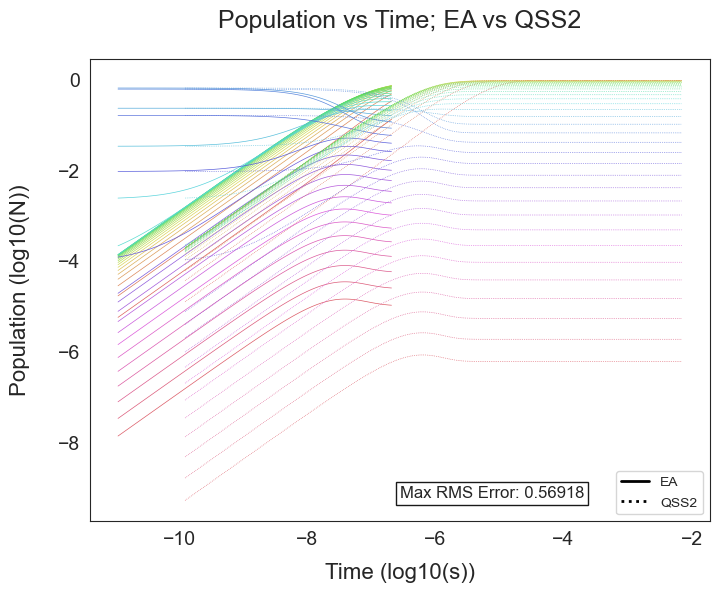

In [2]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Function to load data from files
def load_data(file_dir, file_prefix, num_files, cpp=True):
    t_values = []
    N_values = []
    for i in range(num_files):
        filename = os.path.join(file_dir, f"PlotFile_{i}")
        
        with open(filename, "r") as f:
            N = []
            for line in f:
                if line.startswith("t:"):
                    t = float(line.split(": ")[1])
                elif line.startswith("N:"):
                    N_line = line.split(": ")[1].strip()
                    N.append(np.array([float(x) for x in N_line.split()]))
        
        t_values.append(t)
        N_values.append(N)
    
    t_array = np.array(t_values)
    N_array = np.array(N_values)

    return t_array, N_array

# Load first C++ data
file_dir_cpp = "./OutputC"
t_array_cpp, N_array_cpp = load_data(file_dir_cpp, "PlotFile_", 99)

# Load second C++ data
file_dir_cpp_2 = "./OutputC2"
t_array_cpp_2, N_array_cpp_2 = load_data(file_dir_cpp_2, "PlotFile_", 99)

# Apply log10 to the arrays
t_log_array_cpp = np.log10(t_array_cpp)
N_log_array_cpp = np.log10(N_array_cpp)

t_log_array_cpp_2 = np.log10(t_array_cpp_2)
N_log_array_cpp_2 = np.log10(N_array_cpp_2)

## Perform the RMS error calculation for each time step
RMS_array = np.zeros((99,))
for i in range(0, 99): # change here
    # Get the reference and approximation calculations for this time step
    R = N_array_cpp[i, :]
    A = N_array_cpp_2[i, :].reshape(N_array_cpp.shape[1], -1)

    # Calculate the residuals for each N value and sum them
    Res = np.abs(A - R)
    StepRes = np.sum(Res)

    # Calculate the RMS error
    RMS = np.sqrt(np.sum(Res**2) / np.prod(Res.shape))

    # Add the RMS error to the array
    RMS_array[i] = RMS # and here

# Find the maximum RMS error and the time step at which it occurs
max_RMS_error = np.max(RMS_array)
max_error_idx = np.unravel_index(np.argmax(RMS_array, axis=None), RMS_array.shape)
max_error_time = t_array_cpp[max_error_idx[0]]

# Set up the plot
sns.set_style("white")
fig, ax = plt.subplots(figsize=(8, 6))

# Generate the 'colors' variable using hls_palette
num_colors = N_log_array_cpp.shape[2]
colors = sns.color_palette("hls", num_colors)

# Plot first C++ data with straight lines
for i in range(N_log_array_cpp.shape[2]):
    ax.plot(t_log_array_cpp[1:], N_log_array_cpp[1:, :, i], c=colors[i], alpha=0.98, linewidth=0.5, zorder=2)

# Plot second C++ data with dotted lines
for i in range(N_log_array_cpp_2.shape[2]):
    ax.plot(t_log_array_cpp_2[1:], N_log_array_cpp_2[1:, :, i], c=colors[i], alpha=0.98, linewidth=0.5, zorder=2, linestyle=':')

ax.set_xlabel("Time (log10(s))", fontsize=16, labelpad=10)
ax.set_ylabel("Population (log10(N))", fontsize=16, labelpad=20)
ax.tick_params(axis='both', which='major', labelsize=14)

# Add title
ax.set_title("Population vs Time; EA vs QSS2", fontsize=18, y=1.05)

# Create a custom legend with visual distinctions
from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color='black', lw=2),
                Line2D([0], [0], color='black', lw=2, linestyle=':')]

ax.legend(custom_lines, ['EA', 'QSS2'], loc='lower right')

# Add RMS error box with a smaller size
ax.text(0.50, 0.05, f"Max RMS Error: {max_RMS_error:.5f}", transform=ax.transAxes, fontsize=12,
        bbox=dict(facecolor='white', edgecolor='black', alpha=0.9, pad=3))

plt.show()


In [3]:
# Perform the RMS error calculation for each time step
RMS_array_cpp = np.zeros((249,))
RMS_array_matlab = np.zeros((250,))
for i in range(1, 250):
    # Get the reference and approximation calculations for this time step
    R = N_array_matlab[i, :]
    A = N_array_cpp[i - 1, :].reshape(N_array_matlab.shape[1], -1)

    # Calculate the residuals for each N value and sum them
    Res = np.abs(A - R)

    # Calculate the RMS error for C++ data
    RMS_cpp = np.sqrt(np.sum(Res**2) / np.prod(Res.shape))
    RMS_array_cpp[i - 1] = RMS_cpp

    # Calculate the RMS error for Matlab data
    RMS_matlab = np.sqrt(np.sum(Res**2) / np.prod(Res.shape))
    RMS_array_matlab[i - 1] = RMS_matlab

# Find the maximum RMS error and the time step at which it occurs for each case
max_RMS_error_cpp = np.max(RMS_array_cpp)
max_error_idx_cpp = np.unravel_index(np.argmax(RMS_array_cpp, axis=None), RMS_array_cpp.shape)
max_error_time_cpp = t_array_cpp[max_error_idx_cpp[0]]

max_RMS_error_matlab = np.max(RMS_array_matlab)
max_error_idx_matlab = np.unravel_index(np.argmax(RMS_array_matlab, axis=None), RMS_array_matlab.shape)
max_error_time_matlab = t_array_matlab[max_error_idx_matlab[0]]

print("C++ Data:")
print("Max RMS Error:", max_RMS_error_cpp)
print("Time step at which it occurs:", max_error_time_cpp)

print("\nMatlab Data:")
print("Max RMS Error:", max_RMS_error_matlab)
print("Time step at which it occurs:", max_error_time_matlab)


IndexError: index 99 is out of bounds for axis 0 with size 99

In [ ]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.lines import Line2D

# Function to load data from files
def load_data(file_dir, file_prefix, num_files, cpp=True):
    t_values = []
    N_values = []
    for i in range(num_files):
        if cpp:
            filename = os.path.join(file_dir, f"PlotFile_{i}")
        else:
            filename = os.path.join(file_dir, f"PlotFile_{i+1}")

        with open(filename, "r") as f:
            if cpp:
                N = []
                for line in f:
                    if line.startswith("t:"):
                        t = float(line.split(": ")[1])
                    elif line.startswith("N:"):
                        N_line = line.split(": ")[1].strip()
                        N.append(np.array([float(x) for x in N_line.split()]))
            else:
                lines = f.readlines()
                t_index = lines.index("t\n") + 1
                t = float(lines[t_index].strip())
                N_index = lines.index("N\n") + 1
                N = []
                while True:
                    try:
                        N.append(float(lines[N_index].strip()))
                        N_index += 1
                    except ValueError:
                        break

        t_values.append(t)
        N_values.append(N)

    t_array = np.array(t_values)
    N_array = np.array(N_values)

    if not cpp:
        N_array = N_array.reshape(len(N_array), 1, -1)

    return t_array, N_array

# Load C++ data
file_dir_cpp = "./OutputC"
t_array_cpp, N_array_cpp = load_data(file_dir_cpp, "PlotFile_", 249)

# Load Matlab data
file_dir_matlab = "./OutputM"
t_array_matlab, N_array_matlab = load_data(file_dir_matlab, "PlotFile_", 250, cpp=False)

# Perform the RMS error calculation for each time step
RMS_array = np.zeros((249,))
for i in range(1, 250):
    # Get the reference and approximation calculations for this time step
    R = N_array_matlab[i, :]
    A = N_array_cpp[i - 1, :].reshape(N_array_matlab.shape[1], -1)

    # Calculate the residuals for each N value and sum them
    Res = np.abs(A - R)
    StepRes = np.sum(Res)

    # Calculate the RMS error
    RMS = np.sqrt(np.sum(Res**2) / np.prod(Res.shape))

    # Add the RMS error to the array
    RMS_array[i - 1] = RMS

# Find the maximum RMS error and the time step at which it occurs
max_RMS_error = np.max(RMS_array)
max_error_idx = np.unravel_index(np.argmax(RMS_array, axis=None), RMS_array.shape)
max_error_time = t_array_matlab[max_error_idx[0]]

# Extract the population at the time of maximum error
N_cpp_max_error = N_array_cpp[max_error_idx[0], :]
N_matlab_max_error = N_array_matlab[max_error_idx[0], :]

# Set up the plot
sns.set_style("white")
fig, ax = plt.subplots(figsize=(8, 6))

# Generate the 'colors' variable using hls_palette
num_colors = N_cpp_max_error.shape[1]
colors = sns.color_palette("hls", num_colors)

# Plot C++ data
for i in range(N_cpp_max_error.shape[1]):
    ax.plot(max_error_time, N_cpp_max_error[:, i], 'o', c=colors[i], alpha=0.98, linewidth=0.5, zorder=2)

# Plot Matlab data
for i in range(N_matlab_max_error.shape[1]):
    ax.plot(max_error_time, N_matlab_max_error[:, i], 'x', c=colors[i], alpha=0.98, linewidth=0.5, zorder=2)

ax.set_xlabel("Time of Max Error", fontsize=16, labelpad=10)
ax.set_ylabel("Population at Max Error", fontsize=16, labelpad=20)
ax.tick_params(axis='both', which='major', labelsize=14)

# Add title
ax.set_title(f"Population at Time of Max Error; Max RMS Error: {max_RMS_error:.7f}", fontsize=18, y=1.05)

# Create a custom legend with visual distinctions
custom_lines = [Line2D([0], [0], marker='o', color='black', lw=0),
                Line2D([0], [0], marker='x', color='black', lw=0)]
ax.legend(custom_lines, ['C++', 'Matlab'], loc='upper right')

plt.show()


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


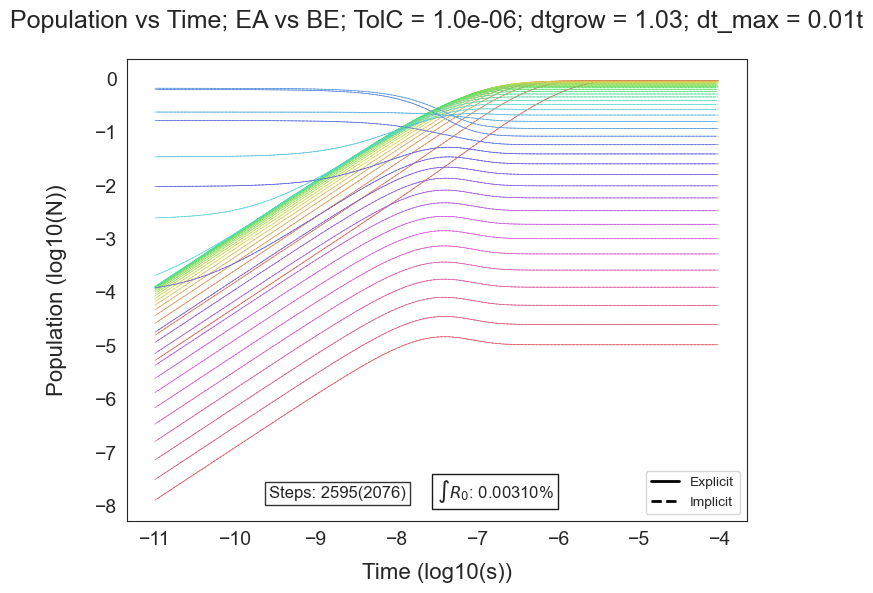

In [316]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.lines import Line2D

# Function to load data from files
def load_data(file_dir, file_prefix, num_files, cpp=True):
    t_values = []
    N_values = []
    for i in range(num_files):
        if cpp:
            filename = os.path.join(file_dir, f"PlotFile_{i}")
        else:
            filename = os.path.join(file_dir, f"PlotFile_{i+1}")
        
        with open(filename, "r") as f:
            if cpp:
                N = []
                for line in f:
                    if line.startswith("t:"):
                        t = float(line.split(": ")[1])
                    elif line.startswith("N:"):
                        N_line = line.split(": ")[1].strip()
                        N.append(np.array([float(x) for x in N_line.split()]))
            else:
                lines = f.readlines()
                t_index = lines.index("t\n") + 1
                t = float(lines[t_index].strip())
                N_index = lines.index("N\n") + 1
                N = []
                while True:
                    try:
                        N.append(float(lines[N_index].strip()))
                        N_index += 1
                    except ValueError:
                        break
        
        t_values.append(t)
        N_values.append(N)
    
    t_array = np.array(t_values)
    N_array = np.array(N_values)
    
    if not cpp:
        N_array = N_array.reshape(len(N_array), 1, -1)

    return t_array, N_array

# Load C++ data
file_dir_cpp = "./OutputC"
t_array_cpp, N_array_cpp = load_data(file_dir_cpp, "PlotFile_", 249)

# Load Matlab data
file_dir_matlab = "./OutputM"
t_array_matlab, N_array_matlab = load_data(file_dir_matlab, "PlotFile_", 250, cpp=False)

# Apply log10 to the arrays
t_log_array_cpp = np.log10(t_array_cpp)
N_log_array_cpp = np.log10(N_array_cpp)
t_log_array_matlab = np.log10(t_array_matlab)
N_log_array_matlab = np.log10(N_array_matlab)

# Initialize new interpolated C++ N_array
N_array_cpp_interpolated = np.zeros(N_array_matlab.shape)

# Interpolate the C++ N_array to match Matlab timesteps
for i in range(N_array_cpp.shape[1]): 
    for j in range(N_array_cpp.shape[2]):
        N_array_cpp_interpolated[:, i, j] = np.interp(t_array_matlab, t_array_cpp, N_array_cpp[:, i, j])

# Perform the RMS error calculation for each time step
RMS_array = np.zeros((250,))
for i in range(1, 250):
    # Get the reference and approximation calculations for this time step
    R = N_array_matlab[i, :, :]
    A = N_array_cpp_interpolated[i, :, :]

    # Calculate the residuals for each N value and sum them
    Res = np.abs(A - R)

    # Calculate the RMS error
    RMS = np.sqrt(np.sum(Res**2) / np.prod(Res.shape))

    # Add the RMS error to the array
    RMS_array[i] = RMS
    
# Set the equilibrium time in log10 scale
equilibrium_log_time = -5

# Convert to linear time scale
equilibrium_time = 10**equilibrium_log_time

# Find the index where time exceeds the equilibrium time
equilibrium_index = np.searchsorted(t_array_matlab, equilibrium_time, side='right')

# Compute the time differences and total error up to the equilibrium time
t_diff = np.diff(t_array_matlab[:equilibrium_index])
error = np.sum(RMS_array[1:equilibrium_index] * t_diff)

# Normalize by total time interval for the sum
total_time_interval = t_array_matlab[equilibrium_index-1] - t_array_matlab[0]
normalized_error = error / total_time_interval

# Convert to percentage
percent_error = normalized_error * 100

# Set up the plot
sns.set_style("white")
fig, ax = plt.subplots(figsize=(8, 6))

# Generate the 'colors' variable using hls_palette
num_colors = N_log_array_cpp.shape[2]
colors = sns.color_palette("hls", num_colors)

# Plot C++ data with straight lines
for i in range(N_log_array_cpp.shape[2]):
    ax.plot(t_log_array_cpp[1:], N_log_array_cpp[1:, :, i], c=colors[i], alpha=0.98, linewidth=0.5, zorder=2)

# Plot Matlab data with dashed lines
for i in range(N_log_array_matlab.shape[2]):
    ax.plot(t_log_array_matlab[1:], N_log_array_matlab[1:, :, i], c=colors[i], alpha=0.98, linewidth=0.5, zorder=2, linestyle='--')

ax.set_xlabel("Time (log10(s))", fontsize=16, labelpad=10)
ax.set_ylabel("Population (log10(N))", fontsize=16, labelpad=20)
ax.tick_params(axis='both', which='major', labelsize=14)

# Add title
ax.set_title("Population vs Time; EA vs BE; TolC = 1.0e-06; dtgrow = 1.03; dt_max = 0.01t", fontsize=18, y=1.05)

# Create a custom legend with visual distinctions
custom_lines = [Line2D([0], [0], color='black', lw=2),
                Line2D([0], [0], color='black', lw=2, linestyle='--')]

ax.legend(custom_lines, ['Explicit', 'Implicit'], loc='lower right')

# Add RMS error box with a smaller size
ax.text(0.50, 0.05, f"$\\int R_0$: {percent_error:.5f}%", transform=ax.transAxes, fontsize=12,
        bbox=dict(facecolor='white', edgecolor='black', alpha=0.9, pad=3))

steps_cpp = 2595
steps_matlab = 2076

# Add Steps box
ax.text(0.23, 0.05, f"Steps: {steps_cpp}({steps_matlab})", transform=ax.transAxes, fontsize=12,
        bbox=dict(facecolor='white', edgecolor='black', alpha=0.8, pad=3))

plt.savefig("Pop_vs_time_Accurate_Model_1.eps", dpi=300, bbox_inches="tight")


plt.show()


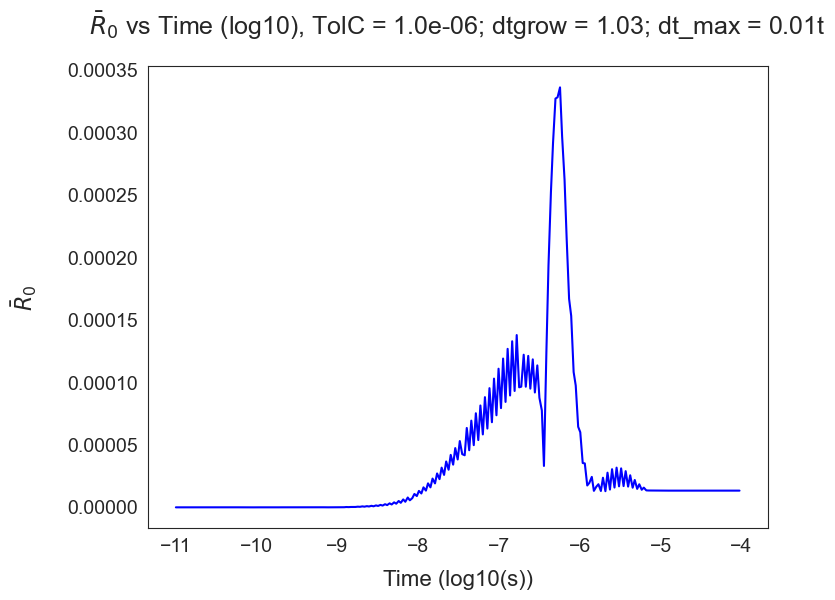

The percent error is 0.00310%


In [315]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def load_data(file_dir, file_prefix, num_files, cpp=True):
    t_values = []
    N_values = []
    for i in range(num_files):
        if cpp:
            filename = os.path.join(file_dir, f"PlotFile_{i}")
        else:
            filename = os.path.join(file_dir, f"PlotFile_{i+1}")
        
        with open(filename, "r") as f:
            if cpp:
                N = []
                for line in f:
                    if line.startswith("t:"):
                        t = float(line.split(": ")[1])
                    elif line.startswith("N:"):
                        N_line = line.split(": ")[1].strip()
                        N.append(np.array([float(x) for x in N_line.split()]))
            else:
                lines = f.readlines()
                t_index = lines.index("t\n") + 1
                t = float(lines[t_index].strip())
                N_index = lines.index("N\n") + 1
                N = []
                while True:
                    try:
                        N.append(float(lines[N_index].strip()))
                        N_index += 1
                    except ValueError:
                        break
        
        t_values.append(t)
        N_values.append(N)
    
    t_array = np.array(t_values)
    N_array = np.array(N_values)
    
    if not cpp:
        N_array = N_array.reshape(len(N_array), 1, -1)

    return t_array, N_array

file_dir_cpp = "./OutputC"
t_array_cpp, N_array_cpp = load_data(file_dir_cpp, "PlotFile_", 249)

file_dir_matlab = "./OutputM"
t_array_matlab, N_array_matlab = load_data(file_dir_matlab, "PlotFile_", 250, cpp=False)

N_array_cpp_interpolated = np.zeros(N_array_matlab.shape)

for i in range(N_array_cpp.shape[1]): 
    for j in range(N_array_cpp.shape[2]):
        N_array_cpp_interpolated[:, i, j] = np.interp(t_array_matlab, t_array_cpp, N_array_cpp[:, i, j])

RMS_array = np.zeros((250,))
for i in range(1, 250):
    R = N_array_matlab[i, :, :]
    A = N_array_cpp_interpolated[i, :, :]
    Res = np.abs(A - R)
    RMS = np.sqrt(np.sum(Res**2) / np.prod(Res.shape))
    RMS_array[i] = RMS

# Set the equilibrium time in log10 scale
equilibrium_log_time = -5

# Convert to linear time scale
equilibrium_time = 10**equilibrium_log_time

# Find the index where time exceeds the equilibrium time
equilibrium_index = np.searchsorted(t_array_matlab, equilibrium_time, side='right')

# Compute the time differences and total error up to the equilibrium time
t_diff = np.diff(t_array_matlab[:equilibrium_index])
error = np.sum(RMS_array[1:equilibrium_index] * t_diff)

# Normalize by total time interval for the sum
total_time_interval = t_array_matlab[equilibrium_index-1] - t_array_matlab[0]
normalized_error = error / total_time_interval

# Convert to percentage
percent_error = normalized_error * 100

t_log_array_matlab = np.log10(t_array_matlab)

sns.set_style("white")
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(t_log_array_matlab[1:], RMS_array[1:], c='blue')
ax.set_xlabel("Time (log10(s))", fontsize=16, labelpad=10)
ax.set_ylabel("$\\bar R_0$", fontsize=16, labelpad=20)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.set_title("$\\bar R_0$ vs Time (log10), TolC = 1.0e-06; dtgrow = 1.03; dt_max = 0.01t", fontsize = 18, y=1.05)

plt.savefig("RMS_vs_time_Accurate_Model_1.eps", dpi=300, bbox_inches="tight")

plt.show()

print(f'The percent error is {percent_error:.5f}%')


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


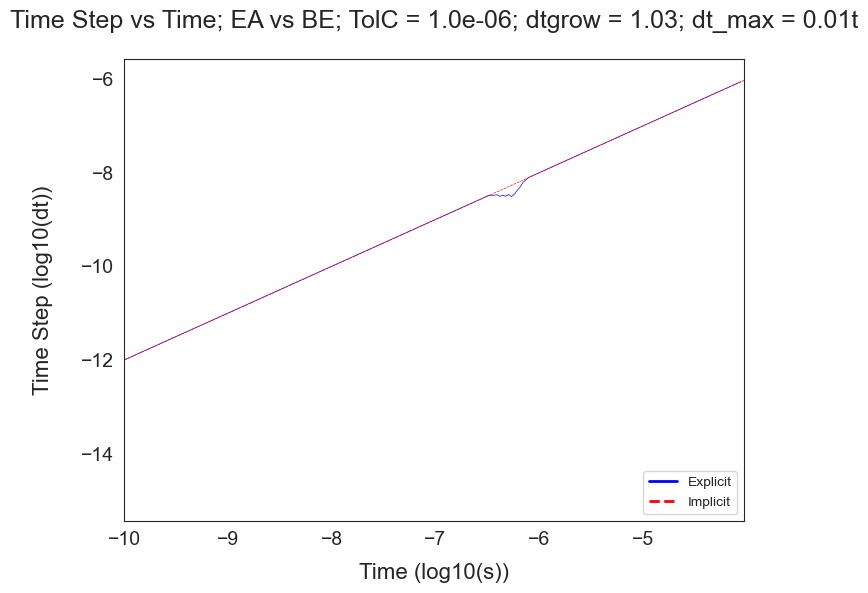

In [314]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.lines import Line2D

# Function to load data from files
def load_data(file_dir, num_files, cpp=True):
    t_values = []
    dt_values = []
    for i in range(num_files):
        if cpp:
            filename = os.path.join(file_dir, f"PlotFile_{i}")
        else:
            filename = os.path.join(file_dir, f"PlotFile_{i+1}")
        
        with open(filename, "r") as f:
            if cpp:
                for line in f:
                    if line.startswith("t:"):
                        t = float(line.split(": ")[1])
                    elif line.startswith("dt:"):
                        dt = float(line.split(": ")[1])
            else:
                lines = f.readlines()
                t_index = lines.index("t\n") + 1
                t = float(lines[t_index].strip())
                dt_index = lines.index("dt\n") + 1
                dt = float(lines[dt_index].strip())
        
        t_values.append(t)
        dt_values.append(dt)
    
    t_array = np.array(t_values)
    dt_array = np.array(dt_values)
    
    return t_array, dt_array

# Load C++ data
file_dir_cpp = "./OutputC"
t_array_cpp, dt_array_cpp = load_data(file_dir_cpp, 249)

# Load Matlab data
file_dir_matlab = "./OutputM"
t_array_matlab, dt_array_matlab = load_data(file_dir_matlab, 250, cpp=False)

# Apply log10 to the arrays
t_log_array_cpp = np.log10(t_array_cpp)
dt_log_array_cpp = np.log10(dt_array_cpp)
t_log_array_matlab = np.log10(t_array_matlab)
dt_log_array_matlab = np.log10(dt_array_matlab)

# Set up the plot
sns.set_style("white")
fig, ax = plt.subplots(figsize=(8, 6))

# Plot C++ data with straight lines
ax.plot(t_log_array_cpp, dt_log_array_cpp, c='blue', alpha=0.98, linewidth=0.5, zorder=2)

# Plot Matlab data with dashed lines
ax.plot(t_log_array_matlab, dt_log_array_matlab, c='red', alpha=0.98, linewidth=0.5, zorder=2, linestyle='--')

ax.set_xlim([-10, max(t_log_array_cpp.max(), t_log_array_matlab.max())])

ax.set_xlabel("Time (log10(s))", fontsize=16, labelpad=10)
ax.set_ylabel("Time Step (log10(dt))", fontsize=16, labelpad=20)
ax.tick_params(axis='both', which='major', labelsize=14)

# Add title
ax.set_title("Time Step vs Time; EA vs BE; TolC = 1.0e-06; dtgrow = 1.03; dt_max = 0.01t", fontsize=18, y=1.05)

# Create a custom legend with visual distinctions
custom_lines = [Line2D([0], [0], color='blue', lw=2),
                Line2D([0], [0], color='red', lw=2, linestyle='--')]

ax.legend(custom_lines, ['Explicit', 'Implicit'], loc='lower right')

plt.savefig("Timestep_vs_time_Accurate_Model_1.eps", dpi=300, bbox_inches="tight")

plt.show()


